In [1]:
!git clone https://github.com/kriyeng/darknet/
%cd darknet
!git checkout feature/google-colab

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 10.13 MiB | 2.05 MiB/s, done.
Resolving deltas: 100% (6742/6742), done.
/content/darknet
Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'


In [2]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sende

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-09-21 04:40:07--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   635KB/s    in 3m 36s  

2020-09-21 04:43:44 (734 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
objdata = '/content/drive/My Drive/Projects/BCCD/WBC-obj.data'
yolov3cfg = '/content/drive/My Drive/Projects/BCCD/yolo_custom.cfg'
#preweights = '/content/darknet/darknet53.conv.74'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!./darknet detector train '$objdata' '$yolov3cfg' '$preweights' -dont_show


yolo_custom
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.3

In [ ]:

saved_weights = '/content/drive/My Drive/Projects/darknet_bloodcells/backup/yolo_custom_last.weights'

In [ ]:
#Start training from last saved weights 
!./darknet detector train '$objdata' '$yolov3cfg' '$saved_weights' -dont_show #| tee  /content/drive/My\ Drive/Projects/BCCD/log.txt

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from matplotlib import patches

objdata = '/content/drive/My Drive/Projects/BCCD/WBC-obj.data'
yolov3cfg = '/content/drive/My Drive/Projects/BCCD/yolo_custom.cfg'
saved_weights = '/content/drive/My Drive/Projects/darknet_bloodcells/backup/yolo_custom_1000.weights'

def PredictandShow(image_loc):
 original_img = cv2.imread(image_loc)
 original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
 result = !./darknet detector test '$objdata' '$yolov3cfg' '$saved_weights' '$image_loc' -dont_show
 confidence = ''
 if(('WBC' in result[-1]) & ('%' in result[-1])):
   confidence = result[-1]
 fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))                
 newImage = cv2.imread('predictions.jpg')
 new_img = cv2.cvtColor(newImage, cv2.COLOR_BGR2RGB)
 ax[0].imshow(original_img)
 ax[0].axis('off')
 ax[1].imshow(new_img)
 ax[1].axis('off')
 ax[1].set_title(confidence, fontsize=30, color="green")

In [ ]:
objdata = '/content/drive/My Drive/Projects/BCCD/WBC-obj.data'
yolov3cfg = '/content/drive/My Drive/Projects/BCCD/yolo_custom.cfg'
saved_weights = '/content/drive/My Drive/Projects/darknet_bloodcells/backup/yolo_custom_last.weights'
image_loc = '/content/drive/My Drive/Projects/fast-rcnn/BCCD/test_images/BloodImage_00410.jpg'
!./darknet detector test '$objdata' '$yolov3cfg' '$saved_weights' '$image_loc'

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

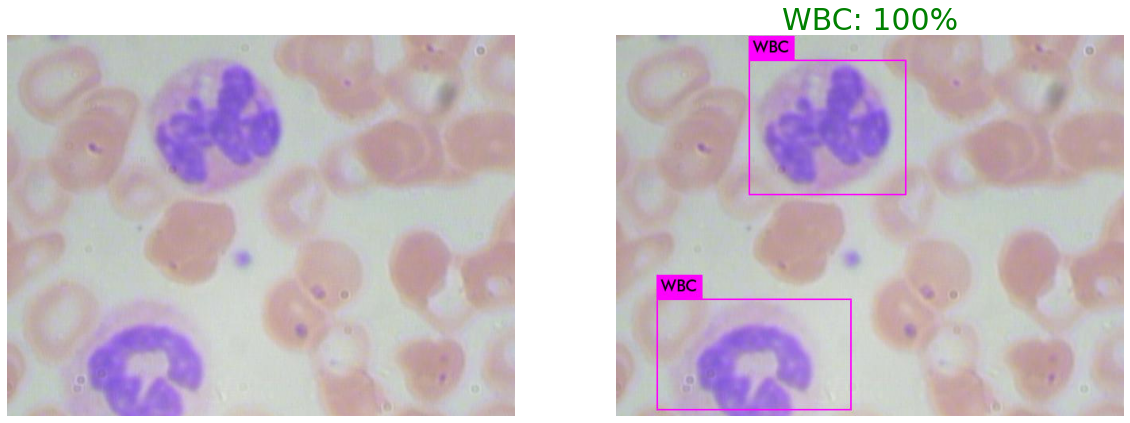

In [ ]:
PredictandShow('/content/drive/My Drive/Projects/BCCD/test_images/BloodImage_00249.jpg')

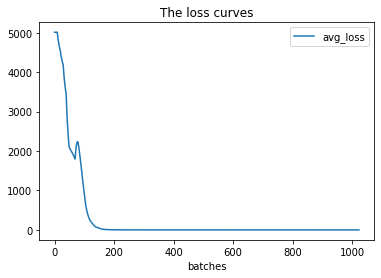

In [ ]:
import inspect
import os
import random
import sys
def extract_log(log_file,new_log_file,key_word):
    with open(log_file, 'r') as f:
      with open(new_log_file, 'w') as train_log:
  #f = open(log_file)
    #train_log = open(new_log_file, 'w')
        for line in f:
    # 去除多gpu的同步log
          if 'Syncing' in line:
            continue
    # 去除除零错误的log
          if 'nan' in line:
            continue
          if key_word in line:
            train_log.write(line)
    f.close()
    train_log.close()
 
extract_log('/content/drive/My Drive/Projects/BCCD4/training_log.txt','train_log_loss.txt','images')
#extract_log('train_yolov3.log','train_log_iou.txt','IOU')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
 
lines =3817    #改为自己生成的train_log_loss.txt中的行数
result = pd.read_csv('train_log_loss.txt',error_bad_lines=False, names=['loss', 'avg', 'rate', 'seconds', 'images'])
result.head()
 
result['loss']=result['loss'].str.split(' ').str.get(1)
result['avg']=result['avg'].str.split(' ').str.get(1)
result['rate']=result['rate'].str.split(' ').str.get(1)
result['seconds']=result['seconds'].str.split(' ').str.get(1)
result['images']=result['images'].str.split(' ').str.get(1)


result['loss']=pd.to_numeric(result['loss'],errors='ignore')
result['avg']=pd.to_numeric(result['avg'],errors='ignore')
result['rate']=pd.to_numeric(result['rate'],errors='ignore')
result['seconds']=pd.to_numeric(result['seconds'],errors='ignore')
result['images']=pd.to_numeric(result['images'],errors='ignore')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(result['avg'].values,label='avg_loss')
ax.legend(loc='best')
ax.set_title('The loss curves')
ax.set_xlabel('batches')
fig.savefig('avg_loss')